In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

FIG_WIDTH = 15
FIGSIZE = (FIG_WIDTH, .618 * FIG_WIDTH)

## MA(1)

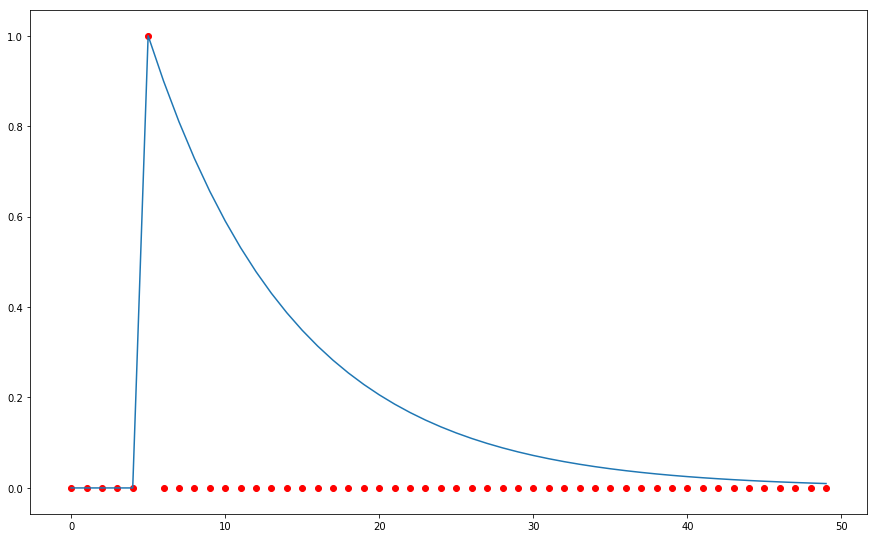

In [2]:
def MA1(inp, rho=.9):
    N_frame = inp.size
    out = np.zeros_like(inp)
    for i in range(1, N_frame):
        out[i] = rho * out[i-1] + inp[i]
    return out

N_frame = 50
one_input = np.zeros(N_frame)
one_input[5] = 1.
time = np.arange(N_frame)
fig, ax = plt.subplots(figsize=FIGSIZE)
ax.plot(MA1(one_input))
ax.scatter(time, one_input, c='r')

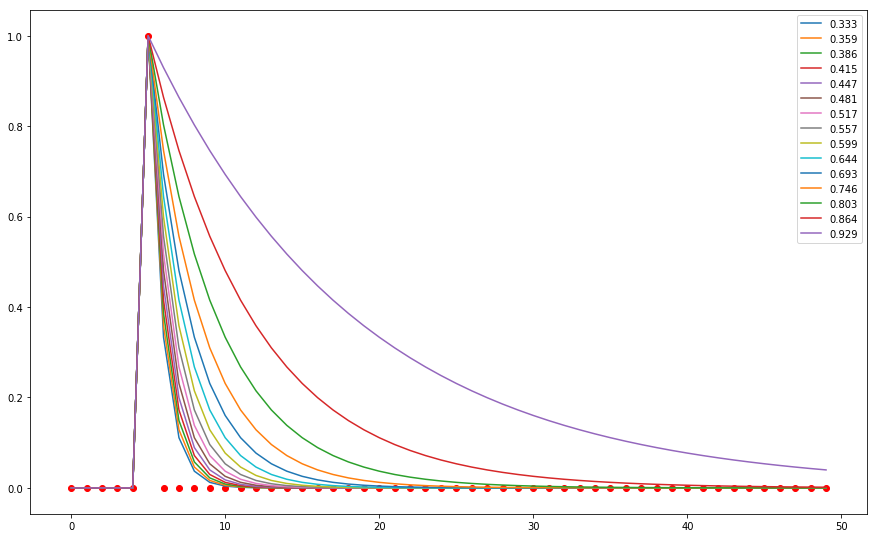

In [3]:

fig, ax = plt.subplots(figsize=FIGSIZE)
for rho in np.logspace(-1, 0, 15, base=3, endpoint=False):
    ax.plot(MA1(one_input, rho=rho), label='%.3f' % rho)
ax.scatter(time, one_input, c='r')
ax.legend()

## difference of 2 MA(1)

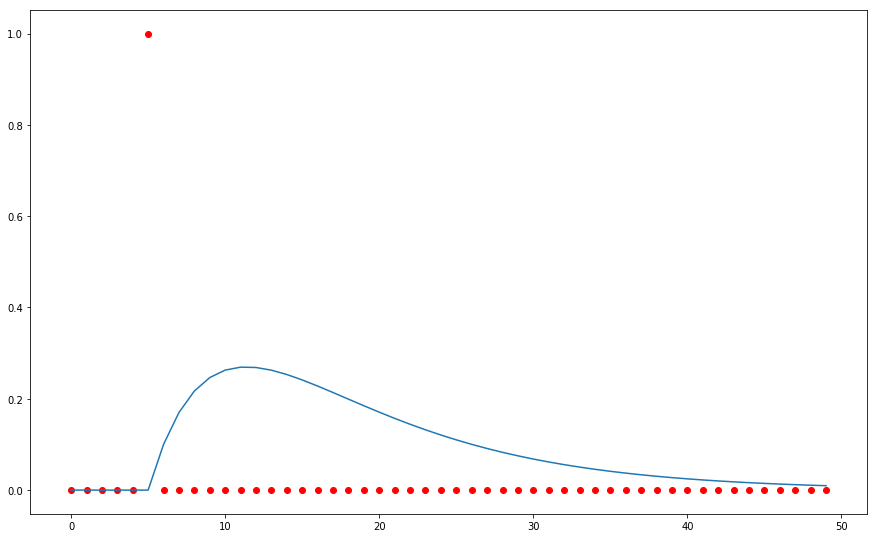

In [4]:
N_frame = 50
one_input = np.zeros(N_frame)
one_input[5] = 1.
time = np.arange(N_frame)
fig, ax = plt.subplots(figsize=FIGSIZE)
ax.plot(MA1(one_input, rho=.9)- MA1(one_input, rho=.8))
ax.scatter(time, one_input, c='r')

## in one function

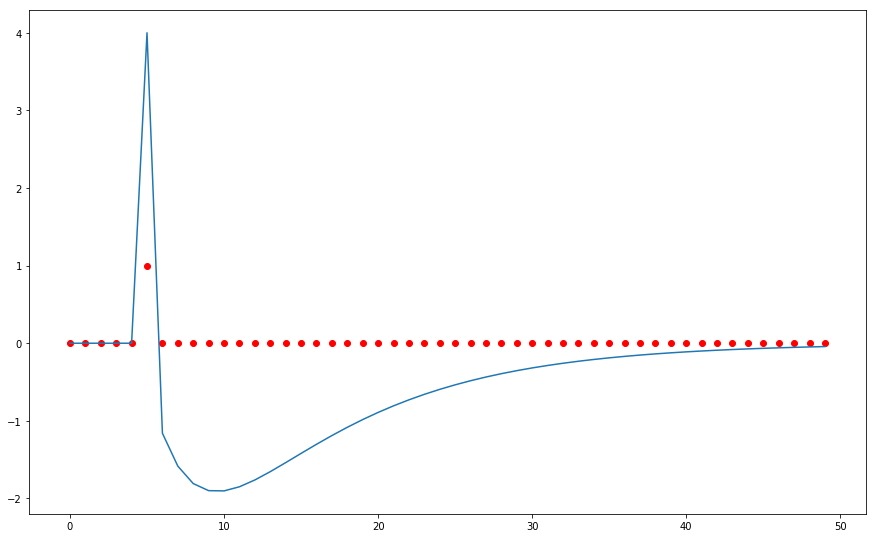

In [19]:
def Cai(inp, rho1=.71, rho2=.9):
    # TODO: vectorize ??
    N_frame = inp.size
    out1, out2 = np.zeros_like(inp), np.zeros_like(inp)
    for i in range(1, N_frame):
        out1[i] = rho1 * out1[i-1] + inp[i]
        out2[i] = rho2 * out2[i-1] + inp[i-1]
    return out1-out2


fig, ax = plt.subplots(figsize=FIGSIZE)
ax.plot(4*Cai(one_input))
ax.scatter(time, one_input, c='r')

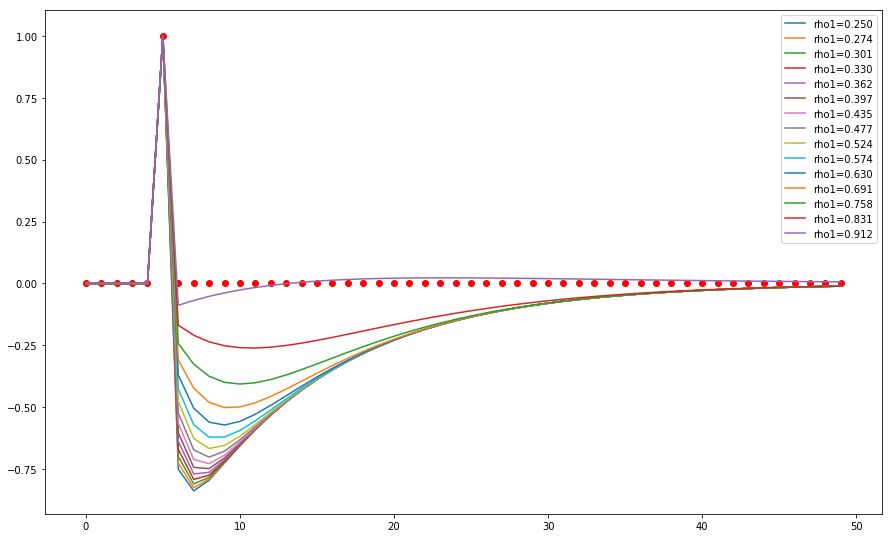

In [20]:
fig, ax = plt.subplots(figsize=FIGSIZE)
for rho1 in np.logspace(-1, 0, 15, base=4, endpoint=False):
    ax.plot(Cai(one_input, rho1=rho1), label='rho1=%.3f' % rho1)
ax.scatter(time, one_input, c='r')
ax.legend()

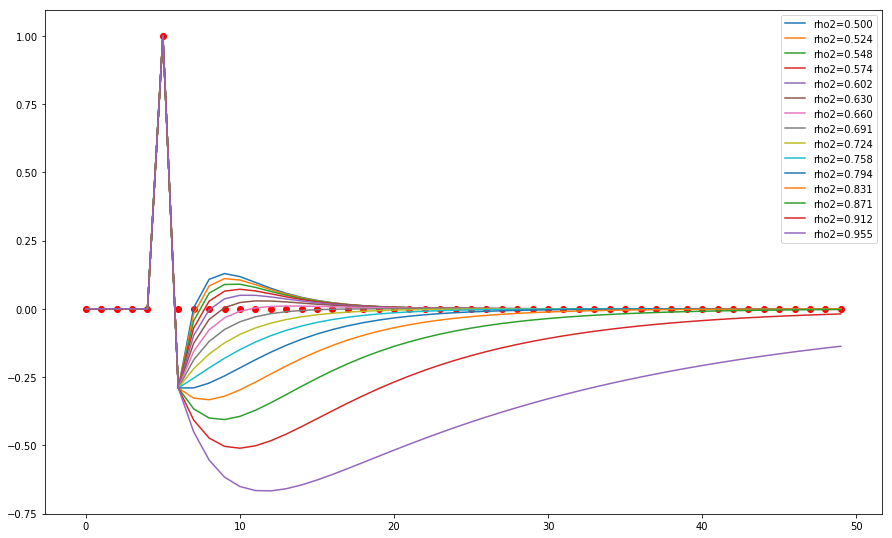

In [21]:
fig, ax = plt.subplots(figsize=FIGSIZE)
for rho2 in np.logspace(-1, 0, 15, base=2, endpoint=False):
    ax.plot(Cai(one_input, rho2=rho2), label='rho2=%.3f' % rho2)
ax.scatter(time, one_input, c='r')
ax.legend()